<a href="https://colab.research.google.com/github/k4rloo23/Caburnay-Carlo-BSCS-3B/blob/main/Activity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carlo R. Caburnay

BSCS-3B

Activity 1

1. Data Loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #Data Visualization

In [ ]:
df = pd.read_csv('hardwareStore.csv')

#print(df.head(21))



In [ ]:
statistics = df.describe()

In [ ]:
numeric_summary = df.agg(['mean', 'median', 'std'])
category_counts = df['CATEGORY_NAME'].value_counts()
print("\nBasic Statistics of the Dataset:")
print(statistics)
print("\nMean, Median, and Standard Deviation of Numeric Columns:")
print(numeric_summary)
print("\nUnique Categories and Their Counts:")
print(category_counts)


Basic Statistics of the Dataset:
       CATEGORY_ID   PRODUCT_ID  STANDARD_COST   LIST_PRICE    REGION_ID  \
count  1112.000000  1112.000000    1112.000000  1112.000000  1112.000000   
mean      3.203237   139.579137     765.520405   950.993327     2.469424   
std       1.637782    84.840057     794.252142   991.070482     0.499289   
min       1.000000     2.000000      12.630000    15.550000     2.000000   
25%       2.000000    71.750000     332.380000   435.222500     2.000000   
50%       4.000000   133.000000     582.020000   744.980000     2.000000   
75%       5.000000   216.000000     799.050000   999.990000     3.000000   
max       5.000000   288.000000    7123.660000  8867.990000     3.000000   

       LOCATION_ID  WAREHOUSE_ID     QUANTITY  
count  1112.000000   1112.000000  1112.000000  
mean     10.971223      5.548561   107.474820  
std       4.662225      2.416821    68.008413  
min       5.000000      1.000000     0.000000  
25%       8.000000      4.000000    50.00

<ipython-input-18-a6ab9e51026d>:2: FutureWarning: ['CATEGORY_NAME', 'PRODUCT_NAME', 'DESCRIPTION', 'DESCRIPTION - Detail 1', 'DESCRIPTION - Detail 2', 'DESCRIPTION - Detail 3', 'DESCRIPTION - Detail 4', 'COUNTRY_ID', 'WAREHOUSE_NAME', 'ADDRESS', 'POSTAL_CODE', 'CITY', 'STATE', 'COUNTRY_NAME'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  numeric_summary = df.agg(['mean', 'median', 'std'])


3. Category Analysis:


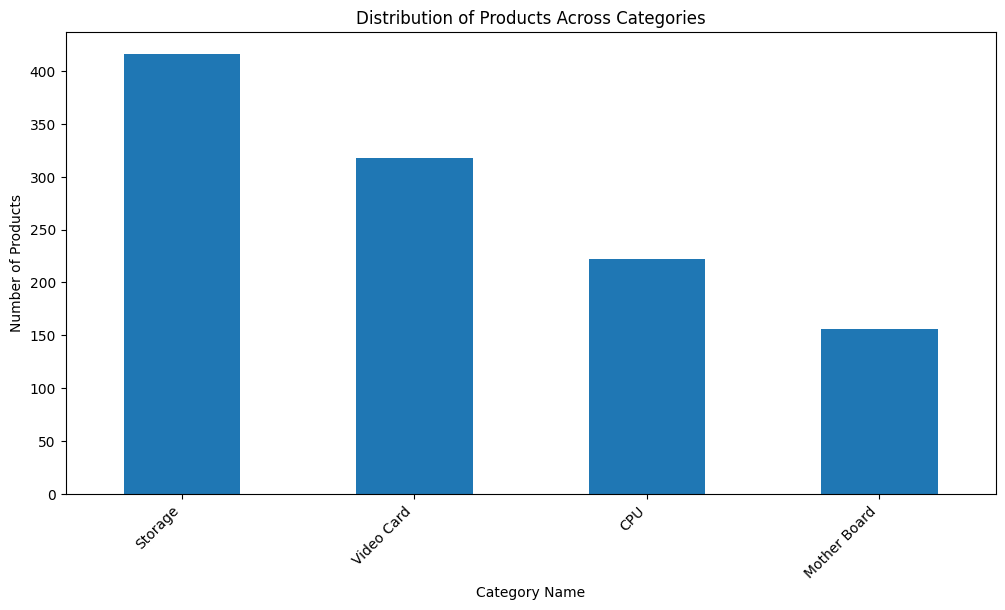


Category with the Highest Number of Products: Storage
Number of Products in the Highest Category: 416


In [ ]:
plt.figure(figsize=(12, 6))
df['CATEGORY_NAME'].value_counts().plot(kind='bar')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Category Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.show()

max_category = df['CATEGORY_NAME'].value_counts().idxmax()
max_products_count = df['CATEGORY_NAME'].value_counts().max()
print(f"\nCategory with the Highest Number of Products: {max_category}")
print(f"Number of Products in the Highest Category: {max_products_count}")

4. Cost and Price Analysis:

In [ ]:
average_standard_cost = df['STANDARD_COST'].mean()
average_list_price = df['LIST_PRICE'].mean()
max_standard_cost_product = df.loc[df['STANDARD_COST'].idxmax()]
max_list_price_product = df.loc[df['LIST_PRICE'].idxmax()]
print("\nAverage Standard Cost:", average_standard_cost)
print("Average List Price:", average_list_price)
print("\nProduct with the Highest Standard Cost:")
print(max_standard_cost_product[['PRODUCT_ID', 'PRODUCT_NAME', 'STANDARD_COST']])
print("\nProduct with the Highest List Price:")
print(max_list_price_product[['PRODUCT_ID', 'PRODUCT_NAME', 'LIST_PRICE']])



Average Standard Cost: 765.520404676259
Average List Price: 950.9933273381293

Product with the Highest Standard Cost:
PRODUCT_ID                          50
PRODUCT_NAME     Intel SSDPECME040T401
STANDARD_COST                  7123.66
Name: 982, dtype: object

Product with the Highest List Price:
PRODUCT_ID                         50
PRODUCT_NAME    Intel SSDPECME040T401
LIST_PRICE                    8867.99
Name: 982, dtype: object


5. Location Analysis:

In [ ]:
max_quantity_location = df.groupby(['CITY', 'STATE'])['QUANTITY'].sum().idxmax()
print("\nLocation with the Highest Quantity of Products in Stock:")
print("City:", max_quantity_location[0])
print("State:", max_quantity_location[1])



Location with the Highest Quantity of Products in Stock:
City: South San Francisco
State: California


6. Insights and Reporting:

In [ ]:
report = """
Analysis Report

1. Data Loading Initial Analysis:
    Basic statistics of the Dataset:
    {}

2. Data Manipulation:
    Total Revenue for each product:
    {}

3. Data Visualization:
    Bar chart displaying revenue for each product is attached.

4. Insights:
    - The product {} generates the highest revenue.
    - On average, {:.2f} units are sold per day.
""".format(statistics, product_revenue, highest_revenue_product, average_quantity_per_day)

print(report)



Analysis Report

1. Data Loading Initial Analysis:
    Basic statistics of the Dataset:
           CATEGORY_ID   PRODUCT_ID  STANDARD_COST   LIST_PRICE    REGION_ID  \
count  1112.000000  1112.000000    1112.000000  1112.000000  1112.000000   
mean      3.203237   139.579137     765.520405   950.993327     2.469424   
std       1.637782    84.840057     794.252142   991.070482     0.499289   
min       1.000000     2.000000      12.630000    15.550000     2.000000   
25%       2.000000    71.750000     332.380000   435.222500     2.000000   
50%       4.000000   133.000000     582.020000   744.980000     2.000000   
75%       5.000000   216.000000     799.050000   999.990000     3.000000   
max       5.000000   288.000000    7123.660000  8867.990000     3.000000   

       LOCATION_ID  WAREHOUSE_ID     QUANTITY  
count  1112.000000   1112.000000  1112.000000  
mean     10.971223      5.548561   107.474820  
std       4.662225      2.416821    68.008413  
min       5.000000      1.0000

In [ ]:
with open ('report.txt','w') as f:
     f.write(report)